# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

We have to first examine a certain set of job postings and their salaries. After understanding the data and how the salaries are based on various factors, we have to predict salaries for a different set of job postings.

In [82]:
#Imported the required libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#For Label Encoding
from sklearn.preprocessing import LabelEncoder

#For Normalization
from sklearn.preprocessing import MinMaxScaler

#For Linear Regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#For Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# Fpr Mean Errors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor

# For Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#Author Information
__author__ = "Rini Lali"
__email__ = "rinilali.91@outlook.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
# File path of the Data that is used for training the model
path_train_f="C:/Users/abhis/Downloads/Rini/Studying/DSDJ/FirstProject/data/train_features.csv"
path_train_s="C:/Users/abhis/Downloads/Rini/Studying/DSDJ/FirstProject/data/train_salaries.csv"

# File path of the data in which the salaries needs to be predicted based on the model
path_test_f="C:/Users/abhis/Downloads/Rini/Studying/DSDJ/FirstProject/data/test_features.csv"

# Reading the csv files into dataframes
df_train_f= pd.read_csv(path_train_f,header=0)
df_train_s= pd.read_csv(path_train_s,header=0)
df_test_f= pd.read_csv(path_test_f,header=0)

In [3]:
# Describe the data to understand what type of data is present in the files
df_train_f.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

In [4]:
# Summary of the data frame that needs to be examined to predict the salaries
df_train_f.info

<bound method DataFrame.info of                    jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperie

In [5]:
# Merged and created one dataframe "data_final" with all the information(train_features+train_salaries)
data_final = pd.merge(df_train_f, df_train_s,  
                   on='jobId',  
                   how='inner')
data_final.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [6]:
#Statistical summary of the columns
data_final.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In our data files, we have jobId, companyId, categorical columns (jobType, degree, major, industry) and numerical columns (yearsExperience, milesFromMetropolis, salary) that will be used to train/test the model.
jobId - represents a unique identifier for the job posting

### ---- 3 Clean the data ----
Looking for duplicate data, invalid data (e.g. salaries <=0), or corrupted data.

In [7]:
# Checked for duplicates and removed them
duplicateRowsDF=data_final.duplicated()
data_final.drop_duplicates()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


There were no duplicates found in the data set.

In [8]:
# Checking for missing Data if any
missing_data = data_final.isnull()
missing_data.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [9]:
# Checked for missing data using value-counts function
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

jobId
False    1000000
Name: jobId, dtype: int64

companyId
False    1000000
Name: companyId, dtype: int64

jobType
False    1000000
Name: jobType, dtype: int64

degree
False    1000000
Name: degree, dtype: int64

major
False    1000000
Name: major, dtype: int64

industry
False    1000000
Name: industry, dtype: int64

yearsExperience
False    1000000
Name: yearsExperience, dtype: int64

milesFromMetropolis
False    1000000
Name: milesFromMetropolis, dtype: int64

salary
False    1000000
Name: salary, dtype: int64



No data was missing in the data set.

In [10]:
# Checking for invalid Data in the columns
sal_incrr=data_final.index[data_final['salary']==0].to_list()
sal_incrr

[30559, 495984, 652076, 816129, 828156]

We found that, in the salary column, there was invalid data.

In [11]:
# Replaced the columns having invalid Data with the mean salary for the respective job type
grp = data_final.groupby('jobType')   
grp['salary'].agg([np.mean])

i=0
len_sal=len(sal_incrr)
while i < len_sal:
    str_job=data_final.loc[sal_incrr[i],'jobType']
    sal=round(grp.get_group(str_job)['salary'].mean())
    data_final.loc[sal_incrr[i],'salary']=sal
    i += 1

In [12]:
# Replaced the invalid data and checked again if any invalid data is present
sal_incrr1=data_final.index[data_final['salary']==0].to_list()
sal_incrr1
#data_final.to_csv("C:/Users/abhis/Downloads/Rini/Studying/DSDJ/FirstProject/data/Train_Data.csv", index=False)

[]

In [13]:
# Stored the cleaned Data is a new CSV file for further analysis
data_final.to_csv("C:/Users/abhis/Downloads/Rini/Studying/DSDJ/FirstProject/data/Train_Data.csv", index=False)

We have prepared and cleaned the data for further analysis. The final data is stored in the "Train_Data" csv file.

### ---- 4 Explore the data (EDA) ----

Preliminary step in Data Analysis :-

     1) We need to summarize the main characteristics of data
     2) Understand the data
     3) Check for relationships betweens the variables present in the data
     

In [14]:
# Get the final data from the new file in the dataframe "df_final"
train_final="C:/Users/abhis/Downloads/Rini/Studying/DSDJ/FirstProject/data/Train_Data.csv"
df_final=pd.read_csv(train_final,header=0)
df_final.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


Descriptive Analysis in EDA

Describing and summarizing the categorical and numerical data

In [15]:
# Checking the counts in categorical values job type, industry, companyId, degree, major. 
# this shows how the data is distributed over various categorical variables

job_type_counts=data_final["jobType"].value_counts()
print(job_type_counts)

industry_counts=data_final["industry"].value_counts()
print(industry_counts)

companyId_counts=data_final["companyId"].value_counts()
print(companyId_counts)

degree_counts=data_final["degree"].value_counts()
print(degree_counts)

major_counts=data_final["major"].value_counts()
print(major_counts)

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64
WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64
COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
          ...  
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length: 63, dtype: int64
HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64
NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64


Using Box Plots to understand the salary distribution by various features.

Box plot will provide us the below data :-

Median of the data

Upper Quartile shows the 75th percentile

Lower Quartile shows the 25th percentile 

Interquartile Range(IQR) represents the data between the Upper and Lower Quartile.

Lower and Upper Extremes which are calculated as 1.5 times the IQR above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.

It will also help us in identifying the outliers if any.

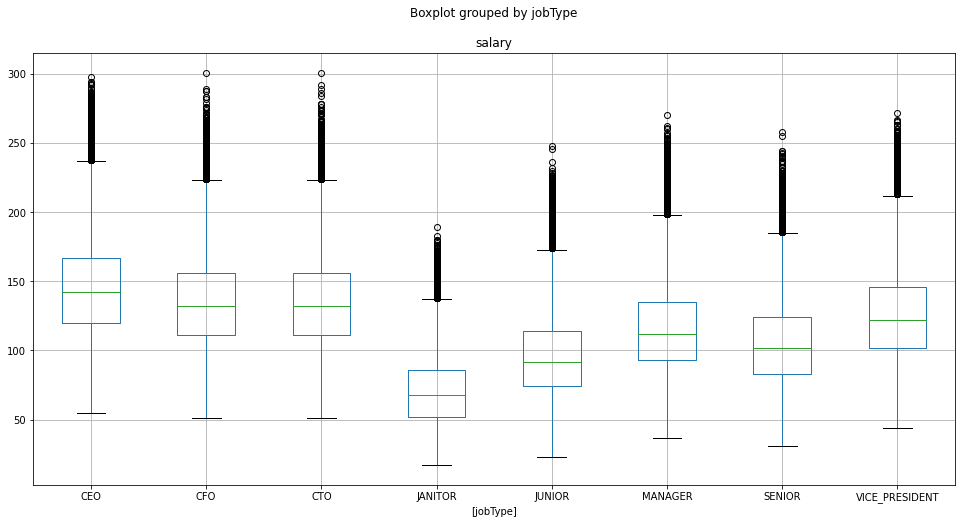

In [16]:
# Boxplot for jobType and salary
bp_jb=df_final.boxplot(column=['salary'],by=['jobType'], rot=0, fontsize=10, figsize=(16,8))

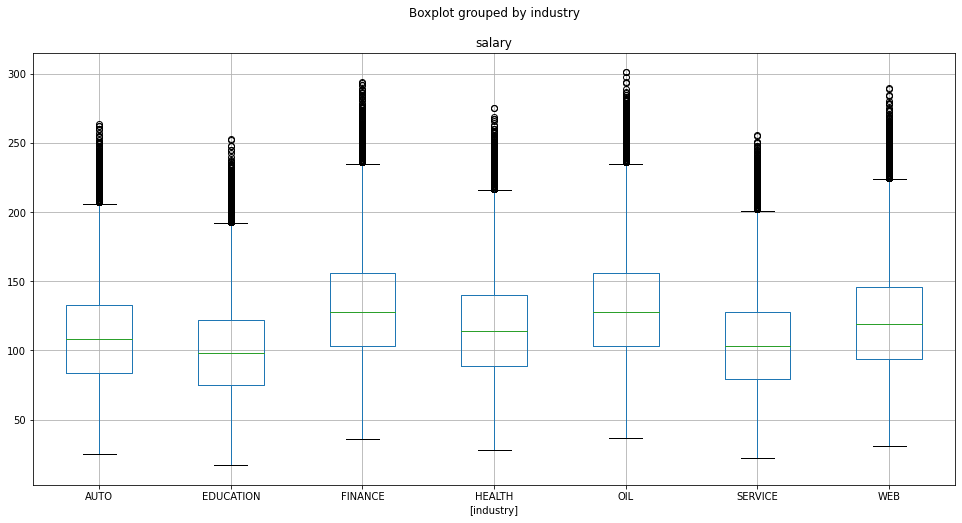

In [17]:
# Boxplot for industry and salary
bp_in=df_final.boxplot(column=['salary'],by=['industry'], rot=0, fontsize=10, figsize=(16,8))

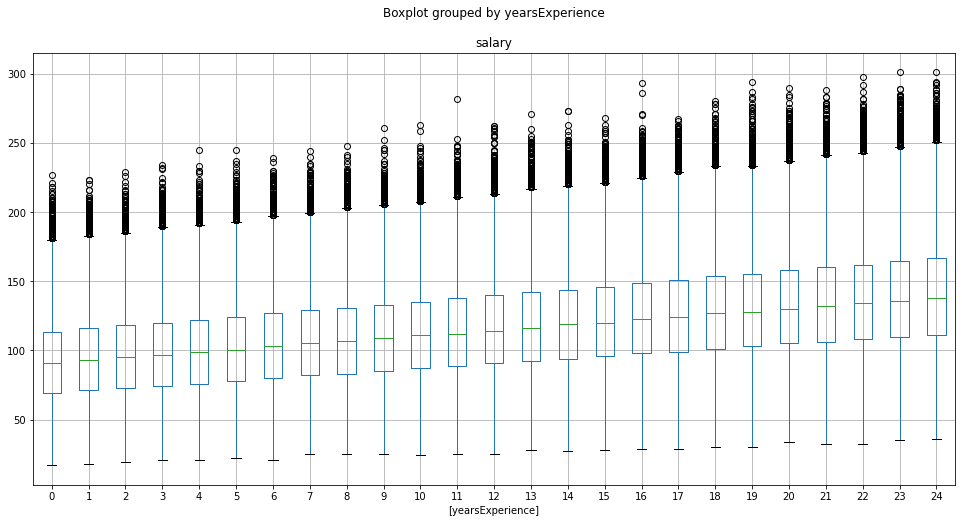

In [18]:
# Boxplot for Experience and salary
bp_exp=df_final.boxplot(column=['salary'],by=['yearsExperience'], rot=0, fontsize=10,figsize=(16,8))

In [19]:
# Grouping the jobType and companyId and extracting the mean salary. 
# How the average salary varies in each company by job type
df_job_cmp=data_final[['jobType','companyId','salary']]
df_job_cmp_grp=df_job_cmp.groupby(['jobType','companyId'],as_index=False).mean()
df_job_cmp_grp_pvt=df_job_cmp_grp.pivot(index='companyId',columns='jobType')
print(df_job_cmp_grp_pvt)

               salary                                                \
jobType           CEO         CFO         CTO    JANITOR     JUNIOR   
companyId                                                             
COMP0      144.693320  135.460674  135.174960  70.612705  96.569827   
COMP1      144.917731  134.557271  135.584980  70.978899  95.817444   
COMP10     146.515657  134.690890  135.153025  70.883848  95.133198   
COMP11     144.134702  135.304603  136.367988  71.392911  95.804192   
COMP12     146.007000  134.625456  135.704691  70.646912  94.764895   
...               ...         ...         ...        ...        ...   
COMP61     147.183528  135.274145  135.769309  71.840039  96.243816   
COMP62     146.728414  134.937028  135.486680  70.740488  96.560976   
COMP7      145.142637  134.875712  134.577020  70.025154  95.476697   
COMP8      145.349329  136.195396  135.003447  71.060926  94.951621   
COMP9      145.632353  135.139546  136.658286  70.755522  94.803571   

     

ANOVA ( Analysis of Variance)

ANOVA can be used to find the correlation between different groups of a categorical variable.

This test returns two variables :     
           1) F-test score - calculates the ratio of variation between the groups's mean over the variation within each of the                              sample groups
           2) p-value      - shows whether the obtained result is statistically significant

If F-score is small, the correlation between the target variable and the groupings is weak.
If F-score is large, the correlation between the target variable and the groupings is strong.

There is a strong correlation between a categorical variable and other variables, if the ANOVA test gives us a large F-test value and a small p-value.

In [20]:
# Checking the correlation between jobType and salary
df_ANOVA=df_final[["jobType","salary"]]
grouped_anova=df_ANOVA.groupby(["jobType"])
anova_res_l=stats.f_oneway(grouped_anova.get_group('JANITOR')['salary'],grouped_anova.get_group('CTO')['salary'])
print(anova_res_l)

F_onewayResult(statistic=307079.0344412673, pvalue=0.0)


In [21]:
# Checking the correlation between degree and salary
df_ANOVA=df_final[["degree","salary"]]
grouped_anova=df_ANOVA.groupby(["degree"])
anova_res_l=stats.f_oneway(grouped_anova.get_group('HIGH_SCHOOL')['salary'],grouped_anova.get_group('MASTERS')['salary'])
print(anova_res_l)

F_onewayResult(statistic=64199.66438514302, pvalue=0.0)


In [22]:
# Checking the correlation between major and salary
df_ANOVA=df_final[["major","salary"]]
grouped_anova=df_ANOVA.groupby(["major"])
anova_res_l=stats.f_oneway(grouped_anova.get_group('MATH')['salary'],grouped_anova.get_group('PHYSICS')['salary'])
print(anova_res_l)

F_onewayResult(statistic=203.34966671974883, pvalue=4.244798582409627e-46)


In [23]:
# Checking the correlation between industry and salary
df_ANOVA=df_final[["industry","salary"]]
grouped_anova=df_ANOVA.groupby(["industry"])
anova_res_l=stats.f_oneway(grouped_anova.get_group('OIL')['salary'],grouped_anova.get_group('HEALTH')['salary'])
print(anova_res_l)

F_onewayResult(statistic=11627.386949306501, pvalue=0.0)


Using the ANOVA method, we found out that salary is correlated with jobType, industry, degree and major variables. The F-value is large and the p-value close to zero which indicates strong correlation between these groups.

In [24]:
# Get the information of all the columns of the final dataset Train_data
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [25]:
# Summarize each feature variable(categorical)
df_final[['jobType','industry','degree','major']].describe(include='all')

,jobType,industry,degree,major
count,1000000,1000000,1000000,1000000
unique,8,7,5,9
top,SENIOR,WEB,HIGH_SCHOOL,NONE
freq,125886,143206,236976,532355


In [26]:
# Summarizing the feature variable(numerical)
df_final[['yearsExperience','milesFromMetropolis']].describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [27]:
# Summarizing the target variable (Salary)
df_final['salary'].describe()

count    1000000.000000
mean         116.062383
std           38.717084
min           17.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

In [28]:
# Grouped the salary on the basis of categorical variables
grouped_df = df_final.groupby(['companyId','industry','jobType','degree','major'])["salary"].agg(['mean'])
print(grouped_df.head(29))

                                                          mean
companyId industry jobType degree      major                  
COMP0     AUTO     CEO     BACHELORS   BIOLOGY      143.166667
                                       BUSINESS     164.750000
                                       CHEMISTRY    128.250000
                                       COMPSCI      142.666667
                                       ENGINEERING  156.200000
                                       LITERATURE   139.600000
                                       MATH         160.000000
                                       NONE         134.833333
                                       PHYSICS      139.750000
                           DOCTORAL    BIOLOGY      123.142857
                                       BUSINESS     157.500000
                                       CHEMISTRY    132.750000
                                       COMPSCI      160.333333
                                       ENGINEERING  169

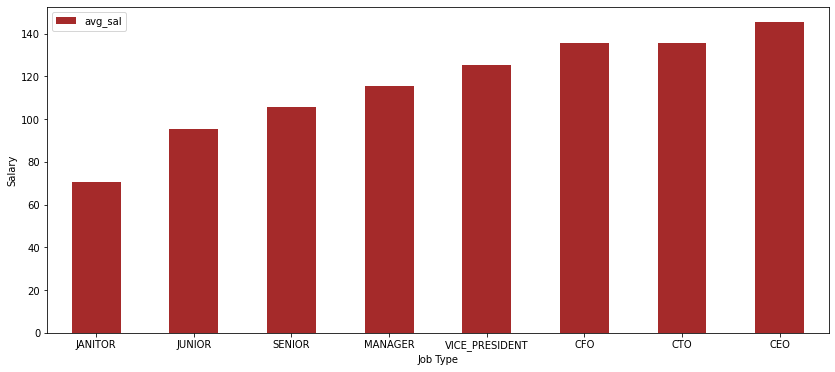

In [29]:
# How target variable 'salary' varies on the feature variable 'jobType'
grp = df_final.groupby('jobType')['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
grp_df=grp_df.sort_values(by='avg_sal')
ax=grp_df.plot.bar(rot=0, fontsize=10,figsize=(14,6),sort_columns=True, color='brown')
ax.set_xlabel("Job Type")
ax.set_ylabel("Salary")
plt.show()

The avgerage salary by job type is lowest for the jobType "Janitor" and highest for "CEO". Job Designation "CEO" has the highest salary.

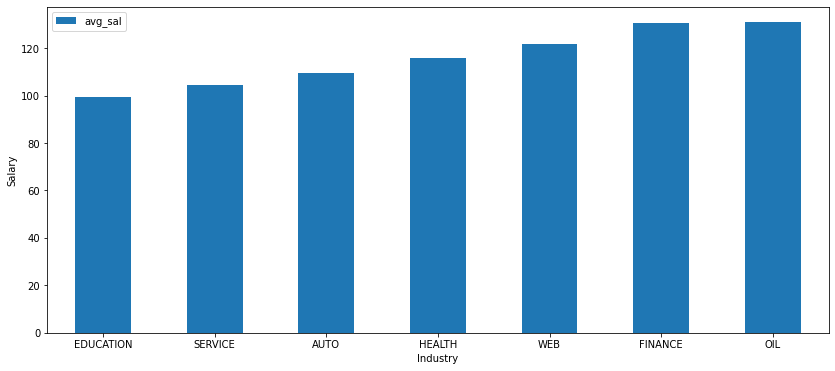

In [30]:
# How target variable 'salary' varies on the feature variable 'industry'
grp = df_final.groupby('industry')['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
grp_df=grp_df.sort_values(by='avg_sal')
ax=grp_df.plot.bar(rot=0, fontsize=10,figsize=(14,6))
ax.set_xlabel("Industry")
ax.set_ylabel("Salary")
plt.show()

From the above bar plot, we can deduce that "Finance" and "Oil" industry have higher salaries than others.

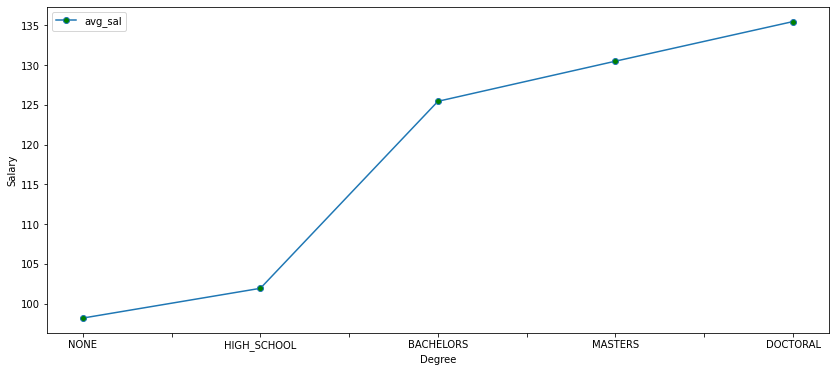

In [31]:
# How target variable 'salary' varies on the feature variable 'degree'
grp = df_final.groupby('degree')['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
grp_df=grp_df.sort_values(by='avg_sal')
ax=grp_df.plot(rot=0, fontsize=10,figsize=(14,6),marker='o',markerfacecolor='green')
ax.set_xlabel("Degree")
ax.set_ylabel("Salary")
plt.show()

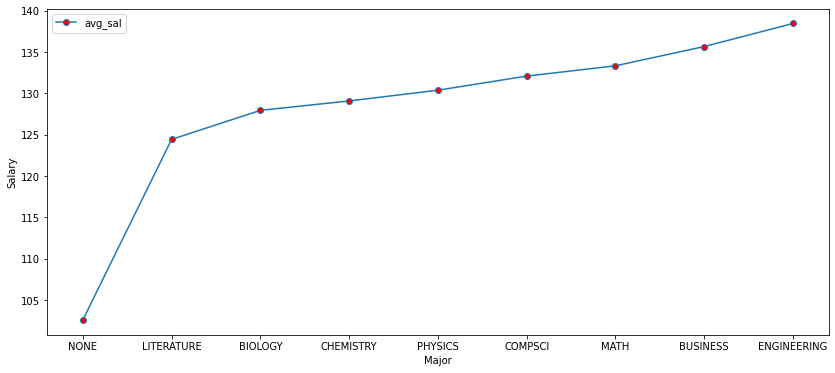

In [32]:
# How target variable 'salary' varies on the feature variable 'major'
grp = df_final.groupby('major')['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
grp_df=grp_df.sort_values(by='avg_sal')
ax=grp_df.plot(rot=0, fontsize=10,figsize=(14,6),marker='o',markerfacecolor='red')
ax.set_xlabel("Major")
ax.set_ylabel("Salary")
plt.show()

After plotting the line graphs, we were able to understand how the salary depends on various feature variables "major" and "degree".
We were also able to understand how salary varies for a jobId having no degree and major. 
Jobs with educational background of Masters and Doctoral will have better salaries were lower as compared to jobs having No degree or "High School".

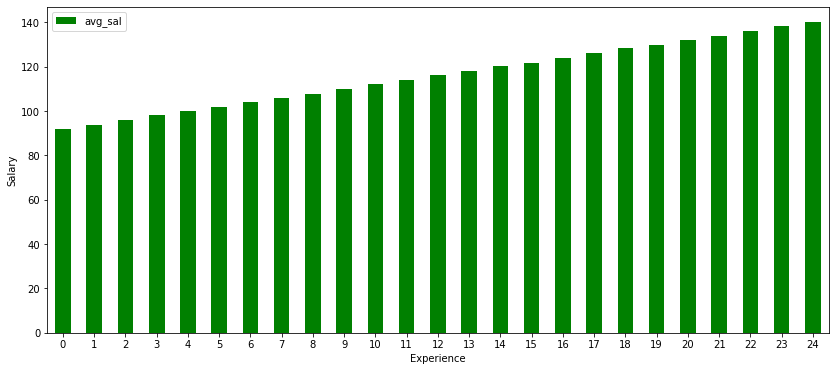

In [33]:
# How target variable 'salary' varies on the feature variable 'Experience'
grp = df_final.groupby('yearsExperience',sort=True)['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
ax=grp_df.plot.bar(rot=0, fontsize=10,figsize=(14,6),color='green')
ax.set_xlabel("Experience")
ax.set_ylabel("Salary")
plt.show()

When we plot the average salary by experience, we found out that salary increases linearly with experience.

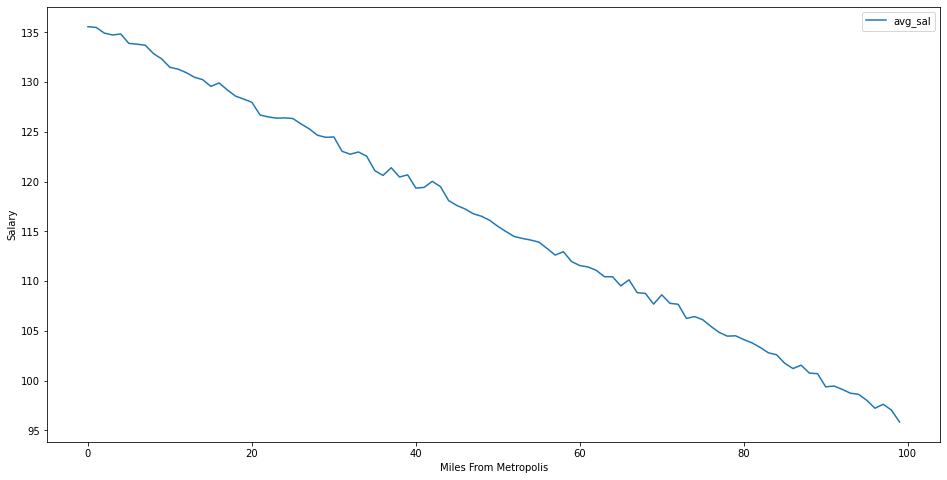

In [34]:
# How target variable 'salary' varies on the feature variable 'milesFromMetropolis'
grp = df_final.groupby('milesFromMetropolis',sort=True)['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
ax=grp_df.plot(rot=0, fontsize=10,figsize=(16,8))
ax.set_xlabel("Miles From Metropolis")
ax.set_ylabel("Salary")
plt.show()

From the above line graph, we understand that salary decreases linearly if we move away from the metropolitan city which is displayed by the feature variable "milesFromMetropolis".

Correlation

Checking correlation between milesFromMetropolis, yearsExperience and salary
Pearson Correlation :

Correlation Coefficient

Close to +1 >>>>> large positive correlation

Close to -1 >>>>> large negative correlation

Close to 0  >>>>> No correlation

p-value:

P-value less than .001 >>>>>  strong certainty

P-value between .001 and .05 >>>>> moderate certainty

P-value between .05 and.1 >>>>> weak certainty

P-value larger than .1 >>>>> no certainty

In [35]:
#looking for correlation between features
df_final[["yearsExperience","milesFromMetropolis","salary"]].corr(method ='pearson')
#pearson_coef, p_value=stats.pearsonr(df_final["milesFromMetropolis"],df_final["salary"])

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375012
milesFromMetropolis,0.000673,1.000000,-0.297684
salary,0.375012,-0.297684,1.000000


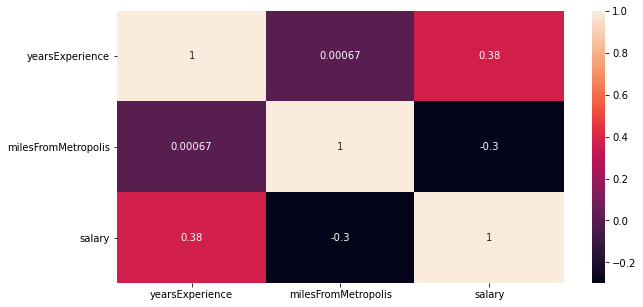

In [36]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
sns.heatmap(df_final.corr(), annot = True)
plt.show()

We found out that we have positive correlation between "salary" and "yearsExperience". There was negative correlation between "salary" and "milesFromMetropolis". 

In [37]:
bins_sal=np.linspace(min(df_final["salary"]),max(df_final["salary"]),4)
group_names=["Low","Medium","High"]
df_final["salary-binned"]=pd.cut(df_final["salary"],bins_sal,labels=group_names,include_lowest=True)
df_final.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,salary-binned
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,Medium
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,Low
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,Medium
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,Medium
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,Medium


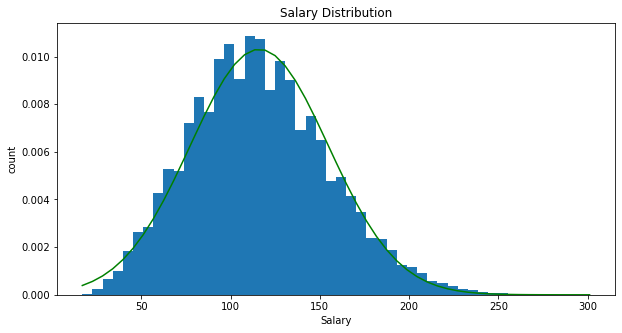

In [38]:
# Salary Distribution
from scipy.stats import norm
# Draw histogram
n,bins,sal_dist=plt.hist(df_final["salary"],bins=50,density=True)

#set x/y labels and plot title
(mu, sigma) = norm.fit(df_final["salary"])
#print(sigma)
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'g-')
plt.xlabel("Salary")
plt.ylabel("count")
plt.title("Salary Distribution")
plt.show()

In [39]:
df_corr=df_final.copy(deep=True)
df_corr.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,salary-binned
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,Medium
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,Low
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,Medium
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,Medium
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,Medium


In [40]:
df_corr[['companyId','jobType','degree','major','industry']]=df_final[['companyId','jobType','degree','major','industry']].astype('category')

In [41]:
df_corr.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,salary-binned
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,Medium
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,Low
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,Medium
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,Medium
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,Medium


In [42]:
df_col_corr=['companyId','jobType','degree','major','industry']
def cat_num(colm):
    for i in colm:
        df_corr[i]=df_corr.groupby(i).transform('mean')['salary']

In [43]:
cat_num(df_col_corr)

In [44]:
df_corr.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,salary-binned
0,JOB1362684407687,115.345049,135.458547,130.505616,133.321379,115.735540,10,83,130,Medium
1,JOB1362684407688,115.756548,145.311425,101.921224,102.583911,121.645385,3,73,101,Low
2,JOB1362684407689,116.224249,125.368627,135.490631,130.372436,115.735540,10,38,137,Medium
3,JOB1362684407690,116.199380,115.368515,135.490631,129.072085,109.435299,8,17,142,Medium
4,JOB1362684407691,115.888501,125.368627,125.454663,130.372436,130.747548,8,16,163,Medium


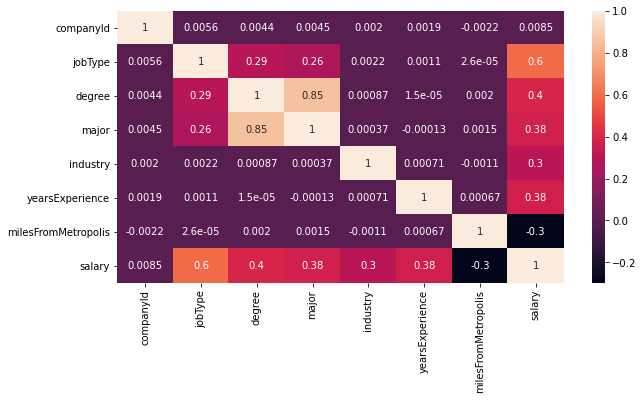

In [45]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

From the heatmap, we can see the correlation between all the feature variables and target variable.

### ---- 5 Establish a baseline ----

In [46]:
# Predicting the values using avg salary for each Job Type
df_salMod=df_final.copy(deep=True)
avg_sal_jT = pd.DataFrame(df_salMod.groupby('jobType')['salary'].mean())
predicted_jT = df_salMod.merge(avg_sal_jT,on='jobType',how='inner')

In [47]:
# Calculating the Mean squared error based on Job Type
mean_sq_err=np.square(np.subtract(predicted_jT['salary_x'],predicted_jT['salary_y'])).mean()
mean_sq_err= round(mean_sq_err,3)
print (mean_sq_err)

963.92


In [48]:
# Predicting the values using avg salary for each Industry
avg_sal_ind = pd.DataFrame(df_salMod.groupby('industry')['salary'].mean())
predicted_ind = df_salMod.merge(avg_sal_ind,on='industry',how='inner')

In [49]:
# Calculating the Mean squared error based on Industry
mean_sq_err=np.square(np.subtract(predicted_ind['salary_x'],predicted_ind['salary_y'])).mean()
mean_sq_err= round(mean_sq_err,3)
print(mean_sq_err)

1367.119


### ---- 6 Hypothesize solution ----

The three models I would like to use to train and test the data are :-

     1) Multiple Linear Regression - refers to the use of multiple independent variables to make a prediction
     2) Random Forest
     3) Gradient Boosting

For making

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [50]:
df_onHtEnc=df_final.copy(deep=True)

In [51]:
df_onHtEnc.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,salary-binned
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,Medium
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,Low
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,Medium
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,Medium
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,Medium


In [52]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model
# creating initial dataframe
# generate binary values using get_dummies
df_onHtEnc = pd.get_dummies(df_onHtEnc, columns=["jobType"], drop_first=True)
df_onHtEnc = pd.get_dummies(df_onHtEnc, columns=["industry"], drop_first=True)
df_onHtEnc = pd.get_dummies(df_onHtEnc, columns=["degree"],drop_first=True)
df_onHtEnc = pd.get_dummies(df_onHtEnc, columns=["major"],drop_first=True)
# merge with main df bridge_df on key values
df_onHtEnc.head()

,jobId,companyId,yearsExperience,milesFromMetropolis,salary,salary-binned,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,...,degree_MASTERS,degree_NONE,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS
0,JOB1362684407687,COMP37,10,83,130,Medium,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,JOB1362684407688,COMP19,3,73,101,Low,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,JOB1362684407689,COMP52,10,38,137,Medium,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,JOB1362684407690,COMP38,8,17,142,Medium,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,COMP7,8,16,163,Medium,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
#df_onHtEnc.info()

In [54]:
df_fin_model=df_final.copy(deep=True)

In [55]:
scaler = MinMaxScaler()
# transform data
df_fin_model[['yearsExperience', 'milesFromMetropolis']] = scaler.fit_transform(df_fin_model[['yearsExperience', 'milesFromMetropolis']])
df_fin_model.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,salary-binned
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,0.416667,0.838384,130,Medium
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,0.125000,0.737374,101,Low
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,0.416667,0.383838,137,Medium
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,0.333333,0.171717,142,Medium
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,0.333333,0.161616,163,Medium


### ---- 8 Create models ----

In [56]:
# For Model Analysis


# Define the predictor and the target variables X and Y respectively
cat_features = ['jobType','industry','degree','major']
num_features = df_fin_model[['yearsExperience', 'milesFromMetropolis']]
Y = df_fin_model.salary
X = df_fin_model[cat_features]
X = pd.get_dummies(data=X)
X = pd.concat([X,num_features],axis=1)
#X.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 100)

In [57]:
# For Multiple Linear Regression(MLR) model analysis

# Create the linear regression object using the constructor
regr = linear_model.LinearRegression()

# Fit the model
regr.fit(X_train, Y_train)
regr.score(X_train, Y_train)

# Obtain the prediction
predicted_mlr = regr.predict(X_test)
#print(predicted_lr)

# Obtain the mean absolute, mean squared, r-squares
mae_MLR = mean_absolute_error(Y_test, predicted_mlr)
print("The mean absolute error (MSE) on test set: {:.4f}".format(mae_MLR))
#print(mae_MLR)

#print("First in-sample predictions:", regr.predict(X_test.head()))
#print("Actual target values for those homes:", Y.head().tolist())

mse_MLR = mean_squared_error(Y_test, predicted_mlr)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_MLR))
#print(mse_MLR)

#print("First in-sample predictions:", regr.predict(X_test.head()))
#print("Actual target values for those homes:", Y.head().tolist())
#rmse = np.sqrt(mean_squared_error(Y_test,predicted_lr))
#print(rmse)

r2_MLR = r2_score(Y_test,predicted_mlr)
print("The r squared error (MSE) on test set: {:.4f}".format(r2_MLR))
#print(r2_MLR)




The mean absolute error (MSE) on test set: 15.8104
The mean squared error (MSE) on test set: 382.8616
The r squared error (MSE) on test set: 0.7439


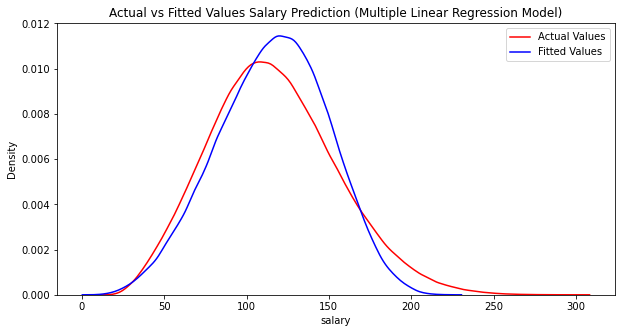

In [58]:
# Multiple Linear Regression Model evaluation using visualisation
ax1=sns.kdeplot(df_fin_model['salary'],color='r',label="Actual Values")
ax1=sns.kdeplot(predicted_mlr,color='b',label="Fitted Values")
plt.legend()
plt.title("Actual vs Fitted Values Salary Prediction (Multiple Linear Regression Model)")
plt.show()

In [59]:
# For Random Forest Regression Model analysis

forest_model = RandomForestRegressor(n_estimators=200,min_samples_leaf=50,n_jobs=2,max_features="auto",oob_score=True,random_state=100)
forest_model.fit(X_train, Y_train)
predicted_rf = forest_model.predict(X_test)

mae_RF = mean_absolute_error(Y_test, predicted_rf)
mse_RF = mean_squared_error(Y_test, predicted_rf)
r2_RF = r2_score(Y_test,predicted_rf)
print("The mean absolute error (MSE) on test set: {:.4f}".format(mae_RF))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_RF))
print("The r squared error (MSE) on test set: {:.4f}".format(r2_RF))
#print(mean_absolute_error(Y_test, predicted_rf))
#print(mean_squared_error(Y_test, predicted_rf))



The mean absolute error (MSE) on test set: 15.5260
The mean squared error (MSE) on test set: 368.9499
The r squared error (MSE) on test set: 0.7532


AttributeError: 'NoneType' object has no attribute 'append'

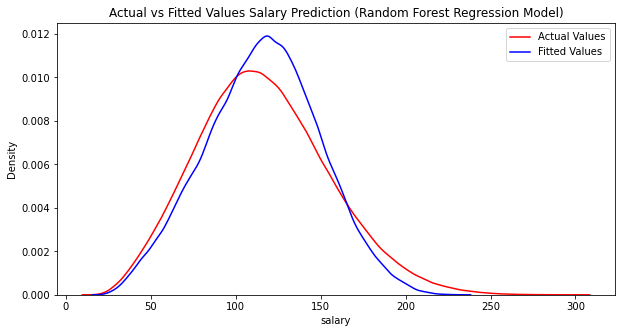

In [60]:
# Random Forest Regression Model evaluation using visualisation
ax1=sns.kdeplot(df_fin_model['salary'],color='r',label="Actual Values")
ax1=sns.kdeplot(predicted_rf,color='b',label="Fitted Values")
plt.legend()
plt.title("Actual vs Fitted Values Salary Prediction (Random Forest Regression Model)")
plt.show()

In [61]:
# For Gradient Boosting Model analysis

grdbst_model = GradientBoostingRegressor(n_estimators=200,max_depth= 5,loss='ls',random_state=100)
grdbst_model.fit(X_train, Y_train)
predicted_gb = grdbst_model.predict(X_test)

mae_GB = mean_absolute_error(Y_test, predicted_gb)
mse_GB = mean_squared_error(Y_test, predicted_gb)
r2_GB = r2_score(Y_test,predicted_gb)
print("The mean absolute error (MSE) on test set: {:.4f}".format(mae_GB))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_GB))
print("The r squared error (MSE) on test set: {:.4f}".format(r2_GB))

#Analysis_Results = Analysis_Results.append(['Gradient Boosting', mae_GB, mse_GB, r2_GB])

The mean absolute error (MSE) on test set: 15.3053
The mean squared error (MSE) on test set: 355.1737
The r squared error (MSE) on test set: 0.7624


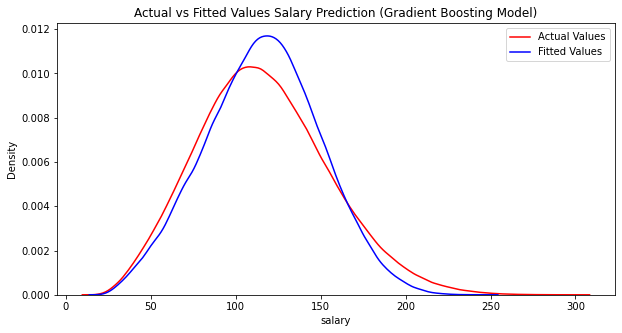

In [62]:
# Gradient Boosting Model evaluation using visualisation
ax1=sns.kdeplot(df_fin_model['salary'],color='r',label="Actual Values")
ax1=sns.kdeplot(predicted_gb,color='b',label="Fitted Values")
plt.legend()
plt.title("Actual vs Fitted Values Salary Prediction (Gradient Boosting Model)")
plt.show()

In [63]:
# Create the multiple polynomial regression object using the constructor
pr = PolynomialFeatures(degree=2,include_bias=False)

# Transforming the predictor variables equation
X_poly=pr.fit_transform(X)
#print(X_poly)

In [64]:
X_train_pr, X_test_pr, Y_train_pr, Y_test_pr = train_test_split(X_poly, Y, test_size = .20, random_state = 100)

pregr = linear_model.LinearRegression()
# Fit the model
pregr.fit(X_train_pr, Y_train_pr)
#regr.score(X_train, Y_train)

# Obtain the prediction
predicted_pr = pregr.predict(X_test_pr)
#print(predicted)

mae_PR = mean_absolute_error(Y_test_pr, predicted_gb)
mse_PR = mean_squared_error(Y_test_pr, predicted_gb)
r2_PR = r2_score(Y_test_pr,predicted_gb)

print("The mean absolute error (MSE) on test set: {:.4f}".format(mae_PR))
#print("First in-sample predictions:", regr.predict(X_test.head()))
#print("Actual target values for those homes:", Y.head().tolist())

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_PR))
#print("First in-sample predictions:", regr.predict(X_test.head()))
#print("Actual target values for those homes:", Y.head().tolist())

print("The r squared error (MSE) on test set: {:.4f}".format(r2_PR))

#Analysis_Results = Analysis_Results.append(['Polynomial Regression', mae_PR, mse_PR, r2_PR])

The mean absolute error (MSE) on test set: 15.3053
The mean squared error (MSE) on test set: 355.1737
The r squared error (MSE) on test set: 0.7624


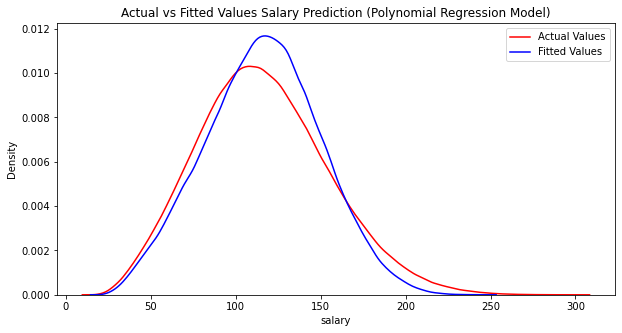

In [65]:
# Polynomial Regression Model evaluation using visualisation
ax1=sns.kdeplot(df_fin_model['salary'],color='r',label="Actual Values")
ax1=sns.kdeplot(predicted_pr,color='b',label="Fitted Values")
plt.legend()
plt.title("Actual vs Fitted Values Salary Prediction (Polynomial Regression Model)")
plt.show()

In [78]:
# Creating a list to strore the results
Analysis_Results = [['Multiple Linear Regression', mae_MLR, mse_MLR, r2_MLR],['Random Forest', mae_RF, mse_RF, r2_RF],['Gradient Boosting', mae_GB, mse_GB, r2_GB],['Polynomial Regression', mae_PR, mse_PR, r2_PR]]
print(Analysis_Results)
df_Result=pd.DataFrame(Analysis_Results)

[['Multiple Linear Regression', 15.810374930419922, 382.86162410710784, 0.7439209877728821], ['Random Forest', 15.525967507795922, 368.94986413667993, 0.7532259416446008], ['Gradient Boosting', 15.30531853042571, 355.1737321179527, 0.762440180047035], ['Polynomial Regression', 15.30531853042571, 355.1737321179527, 0.762440180047035]]


In [80]:
headers = ["Model","Mean_Absolute_Error","Mean_Squared_Error","R_squared"]
df_Result.columns = headers
df_Result.head()

,Model,Mean_Absolute_Error,Mean_Squared_Error,R_squared
0,Multiple Linear Regression,15.810375,382.861624,0.743921
1,Random Forest,15.525968,368.949864,0.753226
2,Gradient Boosting,15.305319,355.173732,0.762440
3,Polynomial Regression,15.305319,355.173732,0.762440


### ---- 9 Test models ----

In [66]:
#do 5-fold cross validation on models and measure MSE

scores_mlr=cross_val_score(regr,X_train, Y_train,cv=5)
scores_mlr=np.mean(scores_mlr)
print("The cross validation score for Linear Model: {:.4f}".format(scores_mlr))

scores_rf=cross_val_score(forest_model,X_train, Y_train,cv=5)
scores_rf=np.mean(scores_rf)
print("The cross validation score for Random Forest Model: {:.4f}".format(scores_rf))

scores_gb=cross_val_score(grdbst_model,X_train, Y_train,cv=5)
scores_gb=np.mean(scores_gb)
print("The cross validation score for Gradient Boost Model: {:.4f}".format(scores_gb))

scores_pr=cross_val_score(pregr,X_train_pr, Y_train_pr,cv=5)
scores_pr=np.mean(scores_pr)
print("The cross validation score for Polynomial Regression Model: {:.4f}".format(scores_pr))


The cross validation score for Linear Model: 0.7435
The cross validation score for Random Forest Model: 0.7515
The cross validation score for Gradient Boost Model: 0.7622
The cross validation score for Polynomial Regression Model: 0.7638


In [ ]:
model = svm.SVC()
accuracy=cross_val_score(model,X_train, Y_train,cv=5, scoring='accuracy')
accuracy
#print("The cross validation score for Linear Model: {:.4f}".format(scores_mlr))

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data